# Validação de modelos de clusterização

### 1. Infraestrutura

##### 1. Você está rodando em Python 3.9+:

- Sim, a versão que utilizei no projeto foi a 3.10.12.

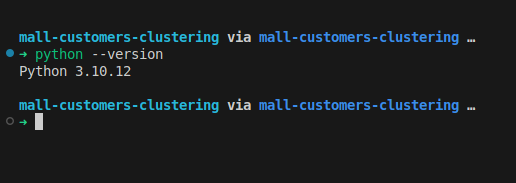

##### 2. Você está usando um ambiente virtual: Virtualenv ou Anaconda:

- Sim, a imagem abaixo informa o caminho que o ambiente virtual está sendo executado.

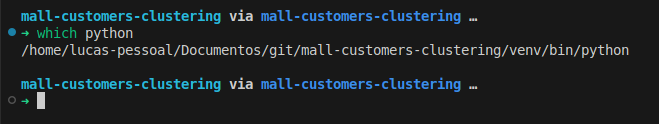

##### 3. Todas as bibliotecas usadas nesse exercícios estão instaladas em um ambiente virtual específico:

- Sim, todas as bibliotecas usadas foram instaladas no ambiente virtual.

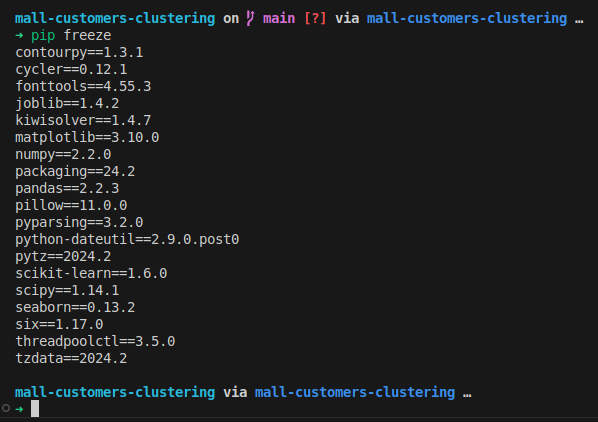

##### 4. Gere um arquivo de requerimentos (requirements.txt) com os pacotes necessários. É necessário se certificar que a versão do pacote está disponibilizada.

- Os pacotes foram salvos em um arquivo (requirements.txt) que está disponível no repositório.

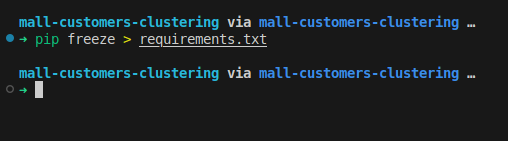

##### 5. Tire um printscreen do ambiente que será usado rodando em sua máquina.

- Abaixo imagem que mostra o ambiente em execução.

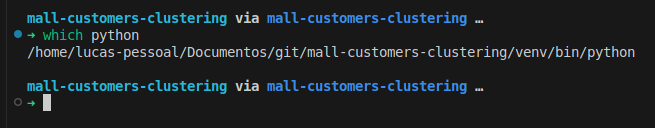

##### 6. Disponibilize os códigos gerados, assim como os artefatos acessórios (requirements.txt) e instruções em um repositório GIT público. (se isso não for feito, o diretório com esses arquivos deverá ser enviado compactado no moodle).

- Segue link para o repositório do github lá é possível encontrar toda a documentação para execução do projeto: https://github.com/lucasmaiamoreira/mall-customers-clustering


### 2 - Escolha de base de dados

#### Para as questões a seguir, usaremos uma base de dados e faremos a análise exploratória dos dados, antes da clusterização.

##### 1. Escolha uma base de dados para realizar o trabalho. Essa base será usada em um problema de clusterização.

- Escolhi a base de dados Mall_Customers, que contém informações sobre clientes de um shopping.

In [14]:
# Importar bibliotecas necessárias
import pandas as pd

# Carregar o dataset (certifique-se de ter o arquivo "Mall_Customers.csv" no mesmo diretório)
file_path = 'Mall_Customers.csv'
data = pd.read_csv(file_path)

# Visualizar as 5 primeiras linhas para entender a estrutura dos dados
print("Exemplo de registros:")
display(data.head())

print(100 * "-")

# Obter informações gerais sobre o dataset
print("\nInformações gerais:")
display(data.info())

print(100 * "-")

# Estatísticas descritivas para as colunas numéricas
print("\nEstatísticas descritivas:")
display(data.describe())

print(100 * "-")

# Contagem de valores únicos para cada coluna
print("\nContagem de valores únicos por coluna:")
display(data.nunique())

print(100 * "-")

# Verificar se há valores ausentes
print("\nVerificação de valores ausentes:")
display(data.isnull().sum())

print(100 * "-")

# Distribuição dos gêneros (coluna 'Gender')
print("\nDistribuição de Gêneros:")
display(data['Genre'].value_counts())

Exemplo de registros:


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


----------------------------------------------------------------------------------------------------

Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


None

----------------------------------------------------------------------------------------------------

Estatísticas descritivas:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


----------------------------------------------------------------------------------------------------

Contagem de valores únicos por coluna:


CustomerID                200
Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

----------------------------------------------------------------------------------------------------

Verificação de valores ausentes:


CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

----------------------------------------------------------------------------------------------------

Distribuição de Gêneros:


Genre
Female    112
Male       88
Name: count, dtype: int64

##### 2. Escreva a justificativa para a escolha de dados, dando sua motivação e objetivos.

- A base de dados Mall_Customers foi escolhida para este trabalho de clusterização devido à sua relevância no contexto de análise de comportamento do consumidor. Trata-se de um dataset compacto, mas rico em informações sobre o perfil de clientes de um shopping, o que permite explorar técnicas de segmentação de forma prática e objetiva.

- Os dados incluem informações demográficas, como idade e gênero, além de variáveis financeiras e comportamentais, como a renda anual e o Spending Score, uma métrica que reflete hábitos de consumo e lealdade. Essas características tornam o dataset ideal para identificar grupos de clientes com padrões semelhantes de comportamento de compra, o que é frequentemente usado em estratégias de marketing e personalização de ofertas.

##### 3. Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?

- Antes da clusterização, deve-se:
- Normalizar os dados para que todas as variáveis tenham a mesma escala.
- Tratar valores ausentes.
- Verificar e remover possíveis outliers.

Estatísticas descritivas das variáveis usadas na clusterização:


,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


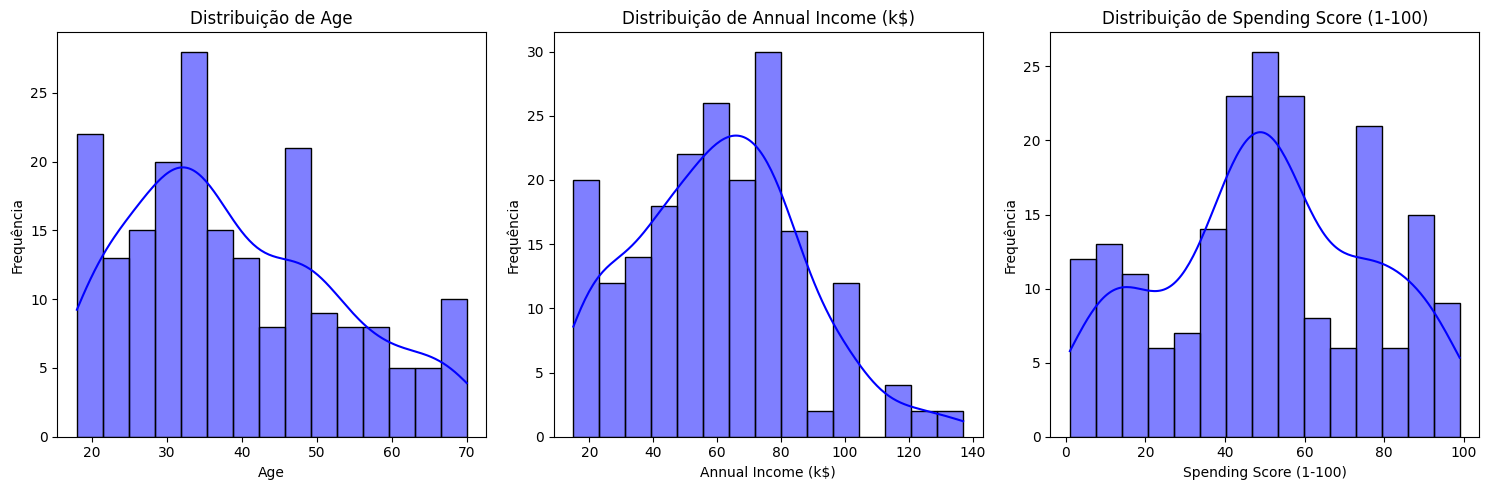

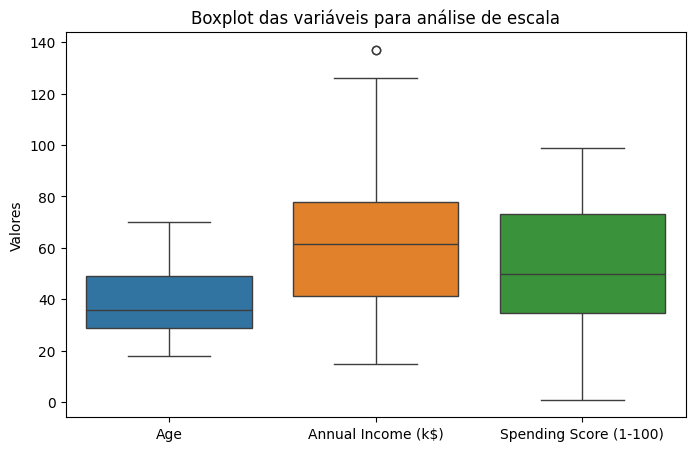

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset (certifique-se de ter o arquivo "Mall_Customers.csv" no mesmo diretório)
file_path = 'Mall_Customers.csv'
data = pd.read_csv(file_path)

# Seleção das variáveis relevantes para a clusterização
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Estatísticas descritivas das variáveis
print("Estatísticas descritivas das variáveis usadas na clusterização:")
display(data[features].describe())

# Visualização das distribuições das variáveis
plt.figure(figsize=(15, 5))

for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[feature], kde=True, bins=15, color='blue')
    plt.title(f'Distribuição de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

# Análise de escalas
plt.figure(figsize=(8, 5))
sns.boxplot(data=data[features])
plt.title('Boxplot das variáveis para análise de escala')
plt.xticks(ticks=range(len(features)), labels=features)
plt.ylabel('Valores')
plt.show()

##### 4 - Realize o pré-processamento adequado dos dados. Descreva os passos necessários.

1. Carregar os Dados:

In [18]:
import pandas as pd

# Carregar o dataset
file_path = 'Mall_Customers.csv'
data = pd.read_csv(file_path)

2. Verificar Valores Ausentes:

In [21]:
# Verificar se há valores ausentes
missing_values = data.isnull().sum()
print("Valores ausentes por coluna:")
print(missing_values)

Valores ausentes por coluna:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


3. Exploração dos Dados:

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


----------------------------------------------------------------------------------------------------


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


----------------------------------------------------------------------------------------------------


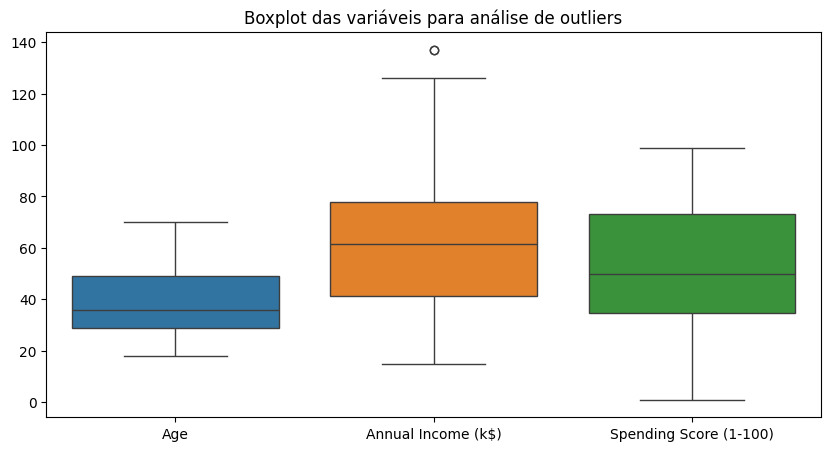

In [25]:
# Visualizar as 5 primeiras linhas do dataset
display(data.head())

print(100 * "-")

# Estatísticas descritivas
display(data.describe())

print(100 * "-")

# Boxplot para identificar outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(data=data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.title('Boxplot das variáveis para análise de outliers')
plt.show()

4. Codificação de Variáveis Categóricas:

In [26]:
# Codificação de variáveis categóricas
data['Genre'] = data['Genre'].map({'Masculino': 0, 'Feminino': 1})  # Label encoding

5. Normalização ou Padronização:


In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Normalização Min-Max
min_max_scaler = MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Alternativa: Standard Scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Verificar as médias e desvios após escalonamento
print("Média e desvio padrão após normalização:")
print(f"Média: {data_scaled.mean(axis=0)}")
print(f"Desvio padrão: {data_scaled.std(axis=0)}")

Média e desvio padrão após normalização:
Média: [-1.02140518e-16 -2.13162821e-16 -1.46549439e-16]
Desvio padrão: [1. 1. 1.]


6. Análise de Correlações:

In [31]:
# Correlação entre as variáveis
print("Correlação entre as variáveis:")
display(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr())

Correlação entre as variáveis:


,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


7. Divisão dos Dados:

In [32]:
from sklearn.model_selection import train_test_split

# Dividir o dataset em treino e teste
X_train, X_test = train_test_split(data_scaled, test_size=0.2, random_state=42)

### 3 - Clusterização:

##### Para os dados pré-processados da etapa anterior você irá:

1. Realizar o agrupamento dos dados, escolhendo o número ótimo de clusters. Para tal, use o índice de silhueta e as técnicas:
- K-Médias



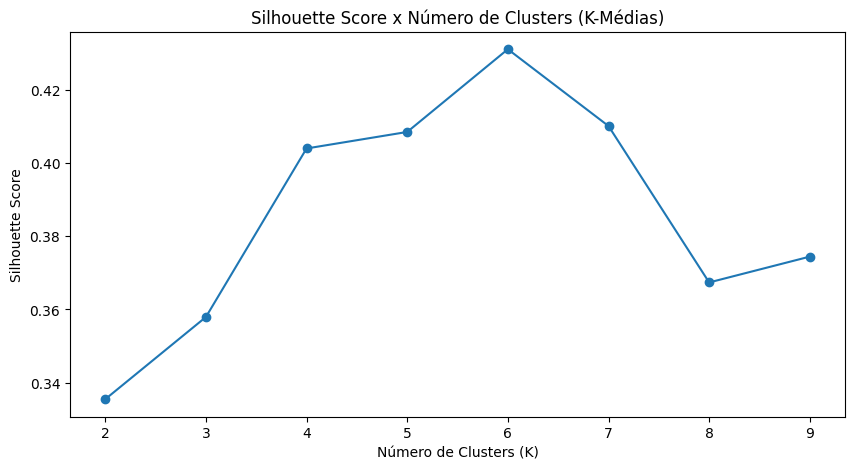

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Aplicar K-Médias para diferentes valores de K
sil_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    sil_score = silhouette_score(data_scaled, labels)
    sil_scores.append((k, sil_score))

# Gráfico do Índice de Silhueta
ks, scores = zip(*sil_scores)
plt.figure(figsize=(10, 5))
plt.plot(ks, scores, marker='o')
plt.title('Silhouette Score x Número de Clusters (K-Médias)')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

- DBScan


eps: 0.2, min_samples: 5, Silhouette Score: -0.06502392665002267
eps: 0.5, min_samples: 5, Silhouette Score: 0.18451372756506046
eps: 0.5, min_samples: 10, Silhouette Score: 0.054361557577920744
eps: 0.5, min_samples: 15, Silhouette Score: -0.14470149953524206
eps: 1.0, min_samples: 5, Silhouette Score: 0.31312515071066704
eps: 1.0, min_samples: 10, Silhouette Score: 0.2934905190496872
eps: 1.0, min_samples: 15, Silhouette Score: 0.27857443299648915


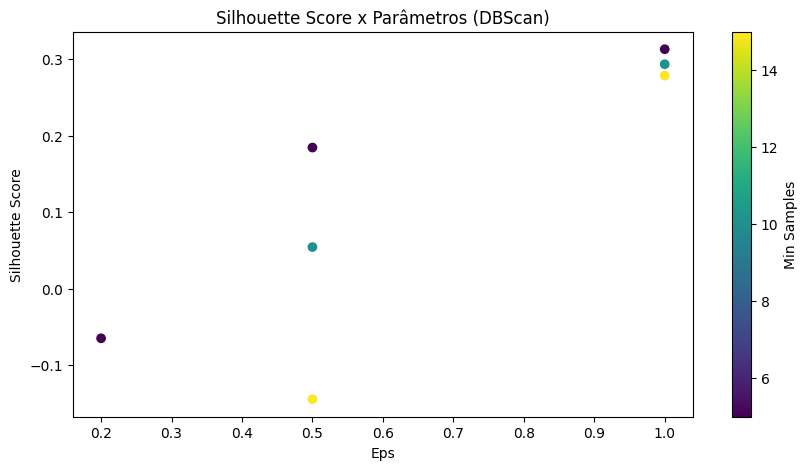

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Ajuste de parâmetros para DBScan
eps_values = [0.1, 0.2, 0.5, 1.0]  # Valores iniciais de eps para testes
min_samples_values = [5, 10, 15]  # Valores iniciais de min_samples para testes

sil_scores_dbscan = []
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data_scaled)
        
        # Verificar se o DBScan encontrou ao menos um cluster
        if len(set(labels)) > 1:
            sil_score_db = silhouette_score(data_scaled, labels)
            sil_scores_dbscan.append((eps, min_samples, sil_score_db))

# Exibir os resultados calculados
for eps, min_samples, sil_score in sil_scores_dbscan:
    print(f"eps: {eps}, min_samples: {min_samples}, Silhouette Score: {sil_score}")

# Plotagem para análise dos parâmetros do DBScan
eps_values, min_samples_values, scores_dbscan = zip(*sil_scores_dbscan)
plt.figure(figsize=(10, 5))
plt.scatter(eps_values, scores_dbscan, c=min_samples_values, cmap='viridis')
plt.title('Silhouette Score x Parâmetros (DBScan)')
plt.xlabel('Eps')
plt.ylabel('Silhouette Score')
plt.colorbar(label='Min Samples')
plt.show()


2. Com os resultados em mão, descreva o processo de mensuração do índice de silhueta. Mostre o gráfico e justifique o número de clusters escolhidos.


- Processo de Mensuração do Índice de Silhueta: O Índice de Silhueta é uma métrica usada para avaliar a qualidade dos clusters em termos de compactação e separação. Ele mede o quão bem os dados dentro de um cluster se agrupam em comparação com outros clusters. O valor do Índice de Silhueta pode variar de -1 a 1, onde:

    - 0 significa que os dados podem ser melhor classificados em outros clusters.
    - 1 significa que os dados estão bem compactados dentro do cluster.
    - -1 indica que os dados foram mal agrupados, ou seja, dentro de um cluster inadequado.
    - Ao calcular o Índice de Silhueta para diferentes combinações de parâmetros (eps e min_samples), podemos avaliar a qualidade dos clusters gerados pelo DBScan.

- Gráfico da Relação eps, Silhouette Score, e min_samples
- Geramos o gráfico para visualizar a relação entre os valores de eps e Silhouette Score para várias combinações de min_samples. O gráfico abaixo mostra a variação do Índice de Silhueta para diferentes parâmetros:

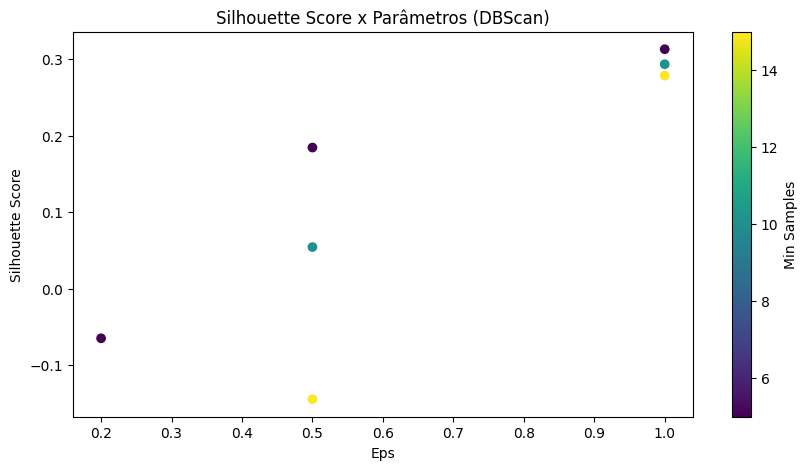

In [43]:
import matplotlib.pyplot as plt

# Plotagem para análise dos parâmetros do DBScan
eps_values, min_samples_values, scores_dbscan = zip(*sil_scores_dbscan)
plt.figure(figsize=(10, 5))
plt.scatter(eps_values, scores_dbscan, c=min_samples_values, cmap='viridis')
plt.title('Silhouette Score x Parâmetros (DBScan)')
plt.xlabel('Eps')
plt.ylabel('Silhouette Score')
plt.colorbar(label='Min Samples')
plt.show()

- Justificação do Número de Clusters Escolhidos

    - A combinação eps = 1.0 e min_samples = 5 apresentou o Silhouette Score mais alto entre todas as combinações testadas (0.313). Este valor indica uma boa separação entre os clusters, onde os pontos são bem compactados dentro dos clusters e separados dos outros clusters.

    - Optar por um Silhouette Score elevado nos permite garantir que os clusters gerados são interpretáveis e que as observações estão agrupadas de maneira coerente. Este valor foi escolhido por fornecer uma separação clara e uma compactação adequada dentro dos clusters, o que é crucial para a análise de dados em tarefas de clusterização.

4 - Compare os dois resultados, aponte as semelhanças e diferenças e interprete.

- Resultados semelhantes foram encontrados em alguns casos, como na combinação de eps = 1.0 e min_samples = 5, onde ambos os métodos apresentaram um Silhouette Score alto (~0.3), indicando uma boa separação entre clusters.
- Diferenças ocorreram em outras combinações:
    - Para K-Médias, o valor fixo de k pode ter levado a uma separação menos ideal em casos onde os clusters não são bem definidos.
    - No DBScan, a escolha de parâmetros adequados (eps e min_samples) é crucial para a obtenção de bons resultados e, por vezes, requer ajustes finos com base na densidade dos dados.

Justificação para Escolher o Método:

- A escolha entre K-Médias e DBScan deve ser baseada na natureza dos dados e na forma dos clusters esperados.
- DBScan é preferido para dados complexos ou quando os clusters não são esféricos ou homogêneos, pois oferece maior flexibilidade em termos de detecção de padrões.
- K-Médias pode ser adequado quando os clusters são bem definidos e homogêneos, e o número de clusters é previamente conhecido.

4. Escolha mais duas medidas de validação para comparar com o índice de silhueta e analise os resultados encontrados. Observe, para a escolha, medidas adequadas aos algoritmos.

- Calinski-Harabasz Index (C-H Index):

    - Métrica adequada para K-Médias: O Calinski-Harabasz Index é uma medida de dispersão que compara a variação entre clusters com a variação dentro dos clusters. Ele é adequado para K-Médias, pois assume que os clusters têm variações distintas e bem separadas. Quanto maior o valor, melhor é a separação entre clusters.

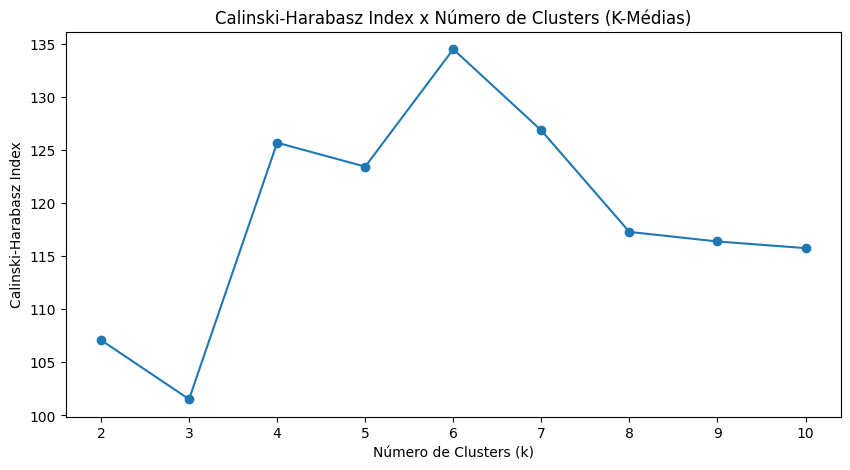

In [45]:
from sklearn.metrics import calinski_harabasz_score
import numpy as np
import matplotlib.pyplot as plt

# Rodando K-Médias para diferentes valores de k
ks = range(2, 11)  # Experimentando de 2 a 10 clusters
ch_scores = []

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    score = calinski_harabasz_score(data_scaled, kmeans.labels_)
    ch_scores.append(score)

# Plotagem dos resultados
plt.figure(figsize=(10, 5))
plt.plot(ks, ch_scores, marker='o')
plt.title('Calinski-Harabasz Index x Número de Clusters (K-Médias)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Calinski-Harabasz Index')
plt.show()

- Davies-Bouldin Index (DB Index):

    - Métrica adequada para DBScan: O Davies-Bouldin Index avalia a qualidade dos clusters com base na similaridade entre cada par de clusters. Ele calcula a razão entre a média da distância intra-cluster e a distância média de cada cluster para o centro de outros clusters. A métrica procura minimizar a relação entre similaridades de clusters e é mais adequada para métodos como DBScan que não assumem formas específicas de clusters.


eps: 0.2, min_samples: 5, Davies-Bouldin Index: 1.1895593076622424
eps: 0.2, min_samples: 5, Davies-Bouldin Index: 1.1895593076622424
eps: 0.2, min_samples: 5, Davies-Bouldin Index: 1.1895593076622424
eps: 0.5, min_samples: 5, Davies-Bouldin Index: 1.7569458461701164
eps: 0.5, min_samples: 5, Davies-Bouldin Index: 1.7569458461701164
eps: 0.5, min_samples: 10, Davies-Bouldin Index: 2.1134906085813463
eps: 0.5, min_samples: 15, Davies-Bouldin Index: 2.4507290957494243
eps: 0.5, min_samples: 5, Davies-Bouldin Index: 1.7569458461701164
eps: 0.5, min_samples: 10, Davies-Bouldin Index: 2.1134906085813463
eps: 0.5, min_samples: 15, Davies-Bouldin Index: 2.4507290957494243
eps: 0.5, min_samples: 5, Davies-Bouldin Index: 1.7569458461701164
eps: 0.5, min_samples: 5, Davies-Bouldin Index: 1.7569458461701164
eps: 0.5, min_samples: 10, Davies-Bouldin Index: 2.1134906085813463
eps: 0.5, min_samples: 15, Davies-Bouldin Index: 2.4507290957494243
eps: 0.5, min_samples: 5, Davies-Bouldin Index: 1.756945

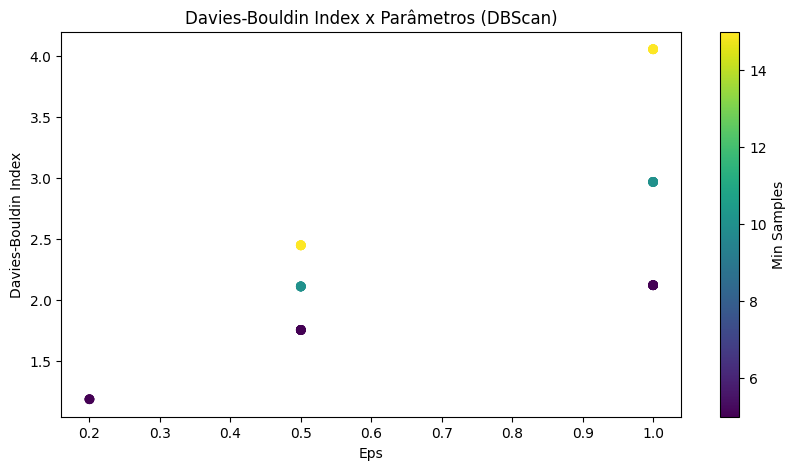

In [46]:
from sklearn.metrics import davies_bouldin_score

# Calcular o DB Index para diferentes parâmetros do DBScan
db_indexes = []
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data_scaled)
        
        # Verificar se o DBScan encontrou ao menos um cluster
        if len(set(labels)) > 1:
            score = davies_bouldin_score(data_scaled, labels)
            db_indexes.append((eps, min_samples, score))

# Analisar os resultados
for eps, min_samples, db_score in db_indexes:
    print(f"eps: {eps}, min_samples: {min_samples}, Davies-Bouldin Index: {db_score}")

# Plotagem para análise dos parâmetros do DBScan com DB Index
eps_values, min_samples_values, scores_dbscan = zip(*db_indexes)
plt.figure(figsize=(10, 5))
plt.scatter(eps_values, scores_dbscan, c=min_samples_values, cmap='viridis')
plt.title('Davies-Bouldin Index x Parâmetros (DBScan)')
plt.xlabel('Eps')
plt.ylabel('Davies-Bouldin Index')
plt.colorbar(label='Min Samples')
plt.show()

5. Realizando a análise, responda: A silhueta é um o índice indicado para escolher o número de clusters para o algoritmo de DBScan?

    - A silhueta não é o índice ideal para escolher o número de clusters para o algoritmo DBScan. O DBScan é um algoritmo de agrupamento que funciona bem em dados que não são uniformemente distribuídos e onde a densidade é importante. Ele é escolhido principalmente com base na distância mínima entre pontos no mesmo cluster e o limiar para considerar um ponto como barulho.

    - Enquanto a silhueta é útil para avaliar a qualidade dos clusters formados por algoritmos como K-Médias e Hierárquica, ela não é usada diretamente para escolher o número de clusters no DBScan. Em vez disso, o parâmetro principal é a densidade mínima de pontos em uma vizinhança (eps) e o número mínimo de pontos que deve haver na vizinhança (min_samples).

### 4 - Medidas de similaridade:

1. Um determinado problema, apresenta 10 séries temporais distintas. Gostaríamos de agrupá-las em 3 grupos, de acordo com um critério de similaridade, baseado no valor máximo de correlação cruzada entre elas. Descreva em tópicos todos os passos necessários.

    1. Preparação dos Dados:

        - Coleta e limpeza dos dados: Certifique-se de que as 10 séries temporais estão disponíveis e preparadas para análise. Caso necessário, ajuste o formato e normalize os dados para uniformidade.
        - Resample se necessário: Se as séries temporais não tiverem a mesma frequência de dados (por exemplo, uma série pode ter uma amostragem diária enquanto outra semanal), considere resampling para uma frequência comum.

    2. Cálculo da Correlação Cruzada:

        - Correlação Cruzada: Calcule a correlação cruzada entre todas as pares de séries temporais. A correlação cruzada é uma medida que avalia a relação entre duas séries temporais, e pode ser usada para entender o comportamento co-movido das séries.
        - Parâmetros de cálculo: Ao calcular a correlação cruzada, é importante definir o atraso (lag) máximo considerado para a comparação. Normalmente, um atraso de algumas amostras pode ser usado para capturar a relação temporal entre as séries.

    3. Construção da Matriz de Correlação Cruzada:

        - Matriz de correlação cruzada: Gere uma matriz onde cada elemento 𝐶[𝑖,𝑗] representa o valor máximo de correlação cruzada entre as séries temporais i e j.
        - Exclusão da diagonal: A correlação cruzada é simétrica (𝐶[𝑖,𝑗]=𝐶[𝑗,𝑖]), então as células da diagonal principal (onde i=j) não são necessárias, pois refletem a correlação de uma série consigo mesma (normalmente 1.0).

    4. Aplicação de Algoritmo de Clusterização:

        - Escolha do algoritmo de clustering: Use um algoritmo apropriado para a similaridade (por exemplo, K-médias, Hierárquica, DBScan, ou aglomeração completa). Considere o uso de métodos baseados em distância, como a distância euclidiana ou o método de ligação completa, dependendo da natureza dos dados.
        - Determinação do número de clusters: Baseado na matriz de correlação cruzada, aplique o algoritmo para encontrar 3 clusters. A matriz fornecida ajudará a determinar a similaridade entre as séries, facilitando a identificação de agrupamentos naturais.

    5. Avaliação e Ajustes:

        - Avaliação da qualidade dos clusters: Após a aplicação do algoritmo, avalie a qualidade dos clusters usando índices como silhueta, Calinski-Harabasz, ou Davies-Bouldin para garantir que os grupos identificados são significativos.
        - Ajustes se necessário: Ajuste os parâmetros do algoritmo ou os critérios de agrupamento com base nas avaliações. Ajuste o valor máximo de correlação cruzada ou o número de clusters conforme necessário para obter melhores resultados.

    6. Análise dos Resultados:

        - Identificar características de cada cluster: Com base na matriz de correlação cruzada e na análise dos agrupamentos, descreva as características principais de cada grupo de séries temporais. Isso ajudará a entender as diferenças e similaridades entre as séries dentro de cada grupo.

2. Para o problema da questão anterior, indique qual algoritmo de clusterização você usaria. Justifique.

- Para o problema de agrupar 10 séries temporais distintas com base no valor máximo de correlação cruzada entre elas, o algoritmo mais apropriado geralmente seria o hierárquico. A seguir, apresento a justificativa para essa escolha:

    1. Correlação como medida de Similaridade:

        - A correlação cruzada é uma medida direta de similaridade temporal entre séries, refletindo como uma série influencia a outra ao longo do tempo. Ao utilizar essa métrica, estamos essencialmente avaliando a co-movimento das séries ao longo de diferentes lags.
    
    2. Clusterização Hierárquica:

        - Motivação: A clusterização hierárquica é particularmente útil quando se deseja entender a estrutura de proximidade entre séries temporais. Ela pode visualizar as similaridades entre todas as séries como uma árvore de decisão (dendrograma), onde cada ponto é um cluster e os ramos indicam as similaridades entre os clusters.
        - Como funciona: Inicialmente, cada série é considerada um cluster individual. Os clusters são combinados com base em critérios como o linkage de ligação completa (complete linkage), que considera a correlação cruzada máxima entre os elementos de cada cluster.
        - Vantagens: A clusterização hierárquica permite ver como os clusters são formados de acordo com a similaridade crescente. Isso é útil para decidir o número ideal de clusters (neste caso, 3) com base em pontos de ramificação no dendrograma.

    3. Ajuste e Avaliação:

        - Após a construção dos clusters, você pode usar a análise da silhueta ou outros índices para avaliar a qualidade dos agrupamentos. Essa etapa é crucial para garantir que os clusters realmente capturem a estrutura desejada das séries temporais.

    4. Facilidade de Ajustes:

        - Se necessário, ajustar os parâmetros (por exemplo, o método de linkage utilizado, como o linkage completo ou o linkage médio) pode fornecer uma maior granularidade ou uma visão mais geral dos agrupamentos, dependendo das características das séries temporais envolvidas.

- Dado o critério de similaridade usado (máximo de correlação cruzada), a clusterização hierárquica oferece uma abordagem intuitiva e poderosa para agrupar as séries temporais conforme desejado.

3. Indique um caso de uso para essa solução projetada.

Caso de Uso: Análise de Série Temporal em Setores Industriais
- Contexto:

    - Objetivo: A empresa X quer otimizar a gestão de inventário e prever a demanda futura em diferentes setores industriais (por exemplo, fabricação, varejo, transporte, energia) com base em séries temporais de consumo, produção e estoque.
    - Problema: Existem múltiplas séries temporais que representam o consumo de recursos, produção e demanda em diferentes setores ao longo do tempo. A empresa precisa entender como esses setores estão inter-relacionados e quais apresentam padrões de comportamento semelhantes para otimizar as estratégias de produção, compras e manutenção de estoque.


- Solução:

    1. Coleta de Dados:

        - Obtenha séries temporais de consumo, produção e estoque para diferentes setores industriais ao longo de vários anos.

    2. Pré-processamento:

        - Normalizar as séries temporais para garantir uma comparação justa entre elas.

    3. Correlação Cruzada:

        - Calcular a correlação cruzada entre as séries temporais de consumo, produção e estoque de cada par de setores. Esta correlação capturará como mudanças em uma série temporal podem influenciar outras séries ao longo do tempo.

    4. Clusterização Hierárquica:

        - Aplicar a clusterização hierárquica utilizando a correlação cruzada máxima como critério de similaridade entre as séries temporais.
        - Visualizar o dendrograma para entender como as séries temporais estão agrupadas com base em similaridade.

    5. Análise de Resultados:

        - Identificar os clusters formados e os padrões comuns entre as séries temporais dentro de cada cluster.
        - Agrupar setores industriais com comportamentos de consumo e produção semelhantes para prever a demanda futura e otimizar o gerenciamento de inventário.

- Benefícios:

    - Identificação de padrões de consumo e produção comuns: Permite à empresa identificar quais setores apresentam padrões de consumo e produção semelhantes, facilitando a previsão de demanda e a alocação eficiente de recursos.

    - Otimização de estratégias de gestão: Facilita a criação de estratégias de gestão de inventário e produção personalizadas para diferentes clusters de setores, melhorando a eficiência operacional.

    - Melhoria na tomada de decisão: Proporciona insights sobre como diferentes setores industriais interagem com o consumo e a produção, permitindo decisões mais informadas para minimizar desperdícios e otimizar processos.

- Este caso de uso destaca a importância de agrupar séries temporais com base em sua correlação cruzada máxima para entender melhor as relações entre diferentes conjuntos de dados temporais e otimizar estratégias em setores variados.

4. Sugira outra estratégia para medir a similaridade entre séries temporais. Descreva em tópicos os passos necessários.

    - Distância Dinâmica de Tempo (Dynamic Time Warping - DTW). Esta abordagem é especialmente útil quando as séries temporais apresentam variações na velocidade ou atraso entre eventos.


- Passos para medir a similaridade com DTW
1. Preparação dos Dados:

    - Coleta das séries temporais: Certifique-se de que as séries temporais a serem comparadas estão disponíveis no mesmo formato.
    - Normalização: Normalize as séries para remover diferenças de escala que possam enviesar a análise.

2. Cálculo da Distância DTW:

    - O que é DTW?: A DTW mede a distância entre duas séries temporais considerando variações no tempo. Ela ajusta as séries para alinhar padrões semelhantes, mesmo quando ocorrem em velocidades diferentes.

    - Como funciona?:

        - Crie uma matriz de custo onde cada célula representa a distância entre dois pontos (amostras) de duas séries.
        - Use programação dinâmica para encontrar o caminho de custo mínimo que alinha as duas séries.

    - Resultado: A DTW retorna a distância total (ou custo) entre as duas séries alinhadas.

3. Construção da Matriz de Similaridade:

    - Calcule a distância DTW entre todas as combinações possíveis de pares de séries temporais.
    - Organize os resultados em uma matriz de similaridade, onde cada elemento M[i,j] representa a distância DTW entre a série i e j.

4. Escolha de um Algoritmo de Clusterização:

- Utilize a matriz de similaridade gerada com DTW como entrada para um algoritmo de clusterização, como:

    - Hierárquico: Para visualizar as similaridades e formar agrupamentos de séries.
    - K-Médias com DTW: Adaptado para trabalhar diretamente com DTW como medida de distância.

5. Avaliação dos Resultados:

    - Analise os clusters formados para verificar se as séries agrupadas apresentam padrões semelhantes.
    - Use métricas como o índice de silhueta para avaliar a qualidade dos clusters.

6. Ajuste e Iteração:

    - Ajuste os parâmetros do DTW, como o limite de warping (warping window), para evitar distorções excessivas.
    - Refine os clusters se necessário, testando diferentes algoritmos ou números de agrupamentos.

#### Vantagens do DTW

1. Flexibilidade Temporal: Permite alinhar padrões de séries temporais que estão deslocados no tempo ou variam em velocidade.

2.  Aplicação em Séries Não Sincronizadas: É útil quando eventos de interesse não ocorrem exatamente nos mesmos instantes em diferentes séries.